In [1]:
import json
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

start = 0
end = 500
pace = 500
score_dict = defaultdict(list)
matrix = []

def subtract_lists(list1, list2):
    result = []
    for i in range(len(list1)):
        diff = list1[i] - list2[i]
        if diff > 0:
            result.append(1)
        else:
            result.append(0)
    return result

In [2]:
while end<5200:
    end = min(start+pace, 5200)
    with open(f'/mnt/user/E-liyunshui.lys-385738/LLMs/code/DAMO-ConvAI/deep-thinking/save/{start}_{end}_raw_score.json', 'r') as f:
        data = json.load(f)
        for k,v in data.items():
            score_dict[k] = subtract_lists(v[1], v[0])
            matrix.append(score_dict[k])
    start += pace
matrix = np.array(matrix)
similarity = cosine_similarity(matrix, matrix)

In [3]:
similarity[0]

array([1.        , 0.79189419, 0.82930202, ..., 0.80738998, 0.85393543,
       0.83653225])

In [9]:
distances = (1-similarity)*10

In [10]:
distances

array([[ 3.21964677e-14,  2.08105810e+00,  1.70697976e+00, ...,
         1.92610019e+00,  1.46064570e+00,  1.63467749e+00],
       [ 2.08105810e+00,  4.77395901e-14,  1.65449282e+00, ...,
         1.92975081e+00,  1.94099437e+00,  1.86711511e+00],
       [ 1.70697976e+00,  1.65449282e+00,  6.66133815e-15, ...,
         1.11880484e+00,  1.16475002e+00,  9.52434330e-01],
       ...,
       [ 1.92610019e+00,  1.92975081e+00,  1.11880484e+00, ...,
        -1.99840144e-14,  1.00905058e+00,  8.45124327e-01],
       [ 1.46064570e+00,  1.94099437e+00,  1.16475002e+00, ...,
         1.00905058e+00, -1.11022302e-14,  8.52714458e-01],
       [ 1.63467749e+00,  1.86711511e+00,  9.52434330e-01, ...,
         8.45124327e-01,  8.52714458e-01,  1.22124533e-14]])

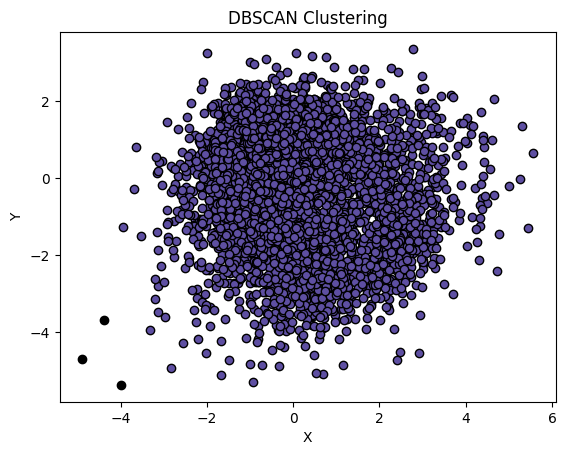

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.cluster import DBSCAN

mds = MDS(n_components=2, dissimilarity='precomputed')
X_transformed = mds.fit_transform(distances)

# 使用DBSCAN算法进行聚类
dbscan = DBSCAN(eps=1, min_samples=2)
labels = dbscan.fit_predict(X_transformed)

# 绘制聚类结果的图形
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # 将噪声数据用黑色表示
        color = 'k'
    
    class_member_mask = (labels == label)
    xy = X_transformed[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], color=color, edgecolor='k')

plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [12]:
unique_labels

array([-1,  0])

In [13]:
labels

array([0, 0, 0, ..., 0, 0, 0])